In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
print(sigmoid(5))

0.9933071490757153


In [4]:
print(sigmoid(-5))

0.0066928509242848554


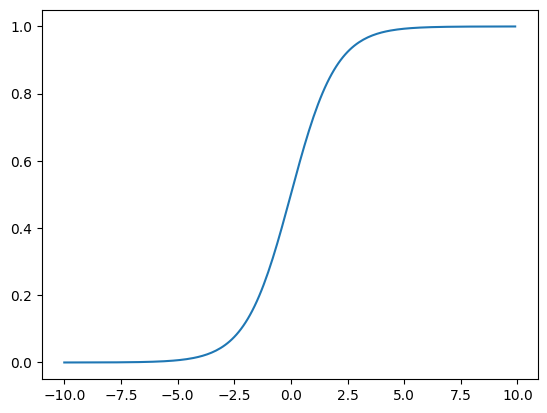

In [5]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x,y)

In [6]:
# Loss Function
def log_loss(y_actual, y_predict):
    """
    y_actual = Actual label => {0, 1}
    y_predict = Predicted probability => (0, 1)
    """
    n = 1#y_actual.shape
    loss = 0
    
    for i in range(0,n):
        loss+= y_actual[i]*np.log(y_predict[i]) + (1-y_actual[i])*np.log(1-y_predict[i])

    return -loss

In [7]:
log_loss([1], [0.0001])

np.float64(9.210340371976182)

In [8]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /Volumes/Additional Drive/Projects/Logistic-Regression/churn_logistic.csv
100%|████████████████████████████████████████| 494k/494k [00:00<00:00, 2.02MB/s]


In [9]:
df = pd.read_csv("churn_logistic.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [10]:
df.shape

(5700, 21)

In [11]:
# We will choose 5 features for our logistic regression which we selected using simple EDA here:
# https://colab.research.google.com/drive/1nkbiGCMrevDzdSG9yN5bXaxeC8CPJSQg?usp=sharing

In [19]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = df['Churn']
y = np.array(y).reshape(len(y), 1) #Reshaping output data to (m,1) shape
X = df[cols]

In [21]:
X.shape, y.shape

((5700, 5), (5700, 1))